In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data

df_original = pd.read_csv(r'C:\Users\Inigo\OneDrive - University of Bristol\Coding Stuff\Applied ML\AppliedML2024\FinalProject\predict-energy-behavior-of-prosumers\train_full.csv')
df = df_original.copy()

In [2]:
# Changing date time into numbers

df["datetime"] = pd.to_datetime(df["datetime"])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday  # Monday is 0 and Sunday is 6

df = df.drop(['datetime'], axis=1)

In [14]:
# Select 400,000 rows

# df = df.sample(n=400000, random_state=1)

# LightGBM quick and dirty

In [11]:
# Seperate the dataset into production and consumption

df = df_original.copy()
production_data = df[df['is_consumption'] == 0]
consumption_data = df[df['is_consumption'] == 1]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.216100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12036
[LightGBM] [Info] Number of data points in the train set: 791792, number of used features: 56
[LightGBM] [Info] Start training from score 89.102900
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 15.210053737525683


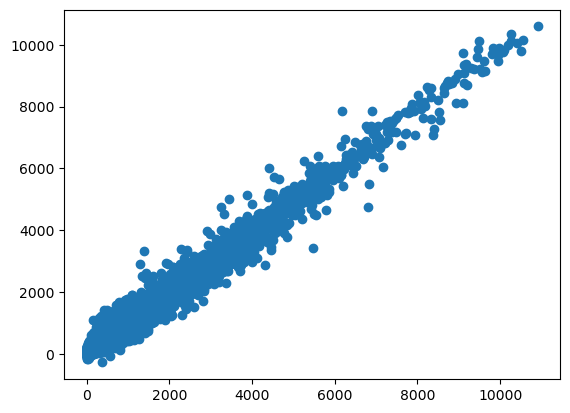

In [22]:
# Run quick LightGBM model for production

X = production_data.drop(['target'], axis=1)
y = production_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, max_depth=10, learning_rate=0.1, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'o')

# Calculate the mean absolute error

print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


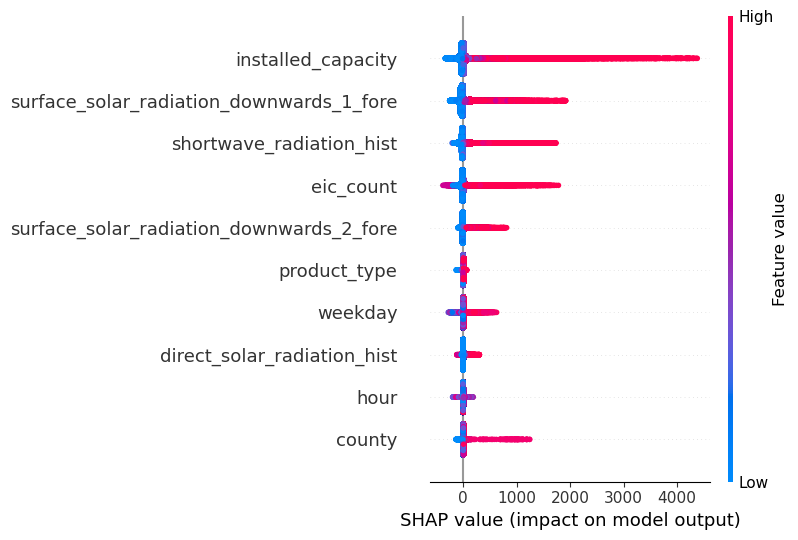

In [18]:
# Now do shap for feature ranking

import shap

shap_values2 = shap.TreeExplainer(model).shap_values(X_train)

shap.summary_plot(shap_values2, X_train, max_display=10)



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 791792, number of used features: 3
[LightGBM] [Info] Start training from score 89.102900
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 31.17504187619756


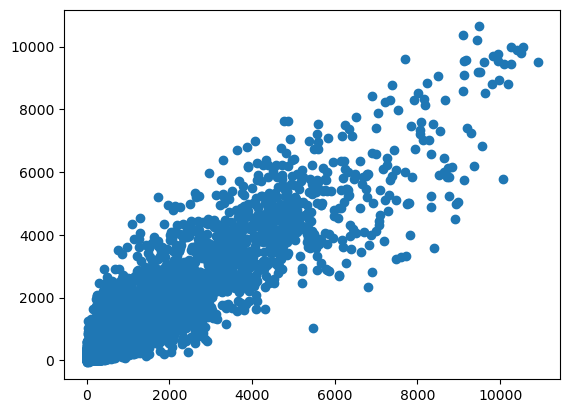

In [17]:
# Run quick LightGBM model for production

top_10 = ['installed_capacity', 'surface_solar_radiation_downwards_1_fore', 'shortwave_radiation_hist', 'eic_count', 'surface_solar_radiation_downwards_2_fore', 'product_type', 'weekday', 'direct_solar_radiation_hist', 'hour', 'county']
top_3 = ['installed_capacity', 'surface_solar_radiation_downwards_1_fore', 'shortwave_radiation_hist']

production_data_10 = production_data.copy()
production_data_10 = production_data_10[top_3]

X = production_data_10
y = production_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, max_depth=10, learning_rate=0.1, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'o')

# Calculate the mean absolute error

print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.161602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12036
[LightGBM] [Info] Number of data points in the train set: 791792, number of used features: 56
[LightGBM] [Info] Start training from score 459.748965
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 46.438482589629714


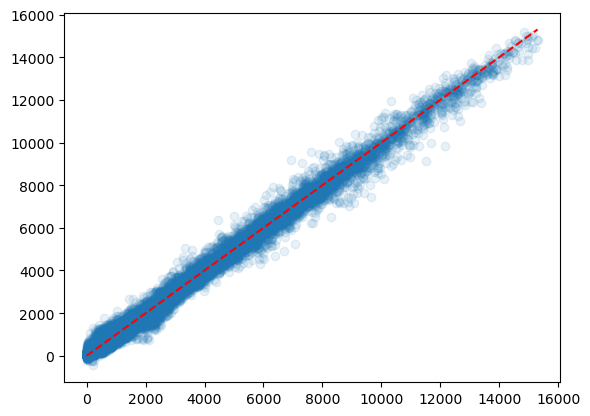

In [20]:
X = consumption_data.drop(['target'], axis=1)
y = consumption_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, max_depth=10, learning_rate=0.1, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'o', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


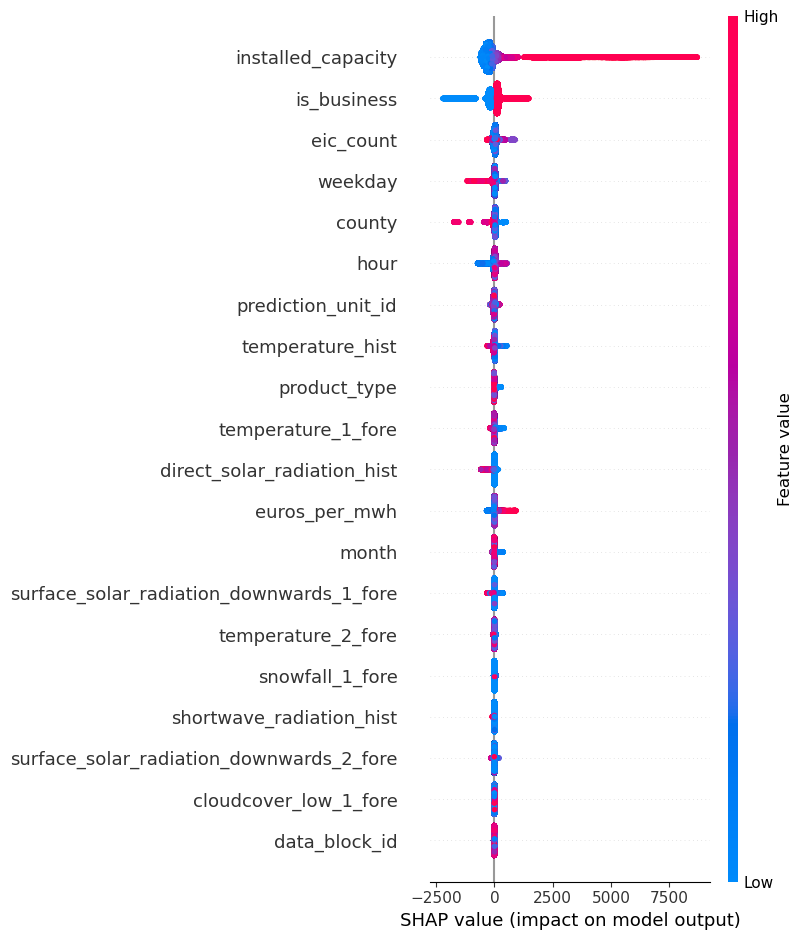

In [13]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

shap.summary_plot(shap_values, X_train, max_display=10)

In [7]:
df = df_original.copy()
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, max_depth=10, learning_rate=0.1, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'o')

# Calculate the mean absolute error

print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: datetime: object

In [ ]:
new_df = df_original.copy()

new_df['preds'] = pd.Series(y_pred)

new_consumption_data = new_df[new_df['is_consumption'] == 1]
new_production_data = new_df[new_df['is_consumption'] == 0]

# Remove Nan

new_consumption_data = new_consumption_data.dropna()
new_production_data = new_production_data.dropna()

print('Mean Absolute Error:', np.mean(np.abs(new_consumption_data['preds'] - new_consumption_data['target'])))
print('Mean Absolute Error:', np.mean(np.abs(new_production_data['preds'] - new_production_data['target'])))

Mean Absolute Error: 577.2821540648614
Mean Absolute Error: 283.41421651846633


In [5]:
new_consumption_data.tail()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,eic_count,...,winddirection_10m_hist,shortwave_radiation_hist,direct_solar_radiation_hist,diffuse_radiation_hist,year,month,day,hour,weekday,preds
1979473,15,0,1,37.058,1,2023-05-29 23:00:00,635,2012103,57,51.0,...,170.0,0.0,0.0,0.0,2023,5,29,23,0,NaN
1979475,15,0,3,110.621,1,2023-05-29 23:00:00,635,2012105,58,161.0,...,170.0,0.0,0.0,0.0,2023,5,29,23,0,NaN
1979477,15,1,0,188.167,1,2023-05-29 23:00:00,635,2012107,64,15.0,...,170.0,0.0,0.0,0.0,2023,5,29,23,0,NaN
1979479,15,1,1,31.484,1,2023-05-29 23:00:00,635,2012109,59,20.0,...,170.0,0.0,0.0,0.0,2023,5,29,23,0,NaN
1979481,15,1,3,177.056,1,2023-05-29 23:00:00,635,2012111,60,55.0,...,170.0,0.0,0.0,0.0,2023,5,29,23,0,NaN


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


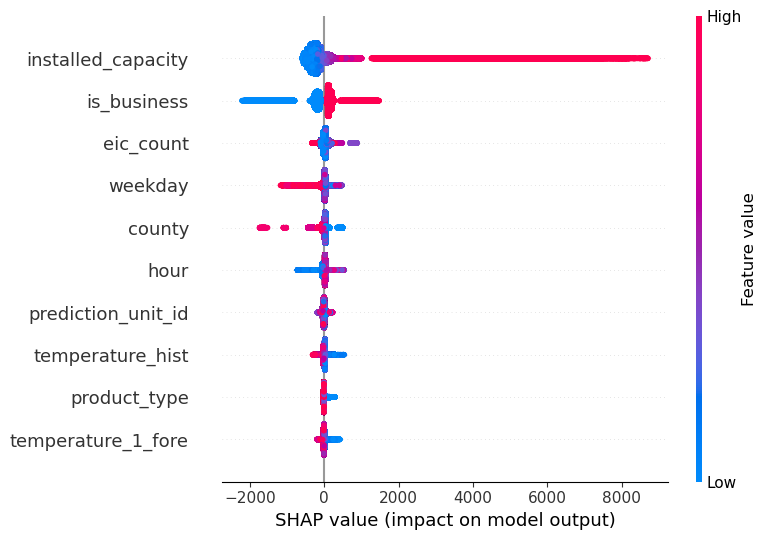

In [14]:
shap.summary_plot(shap_values, X_train, max_display=10)

Mean Absolute Error: 98.99052566962968


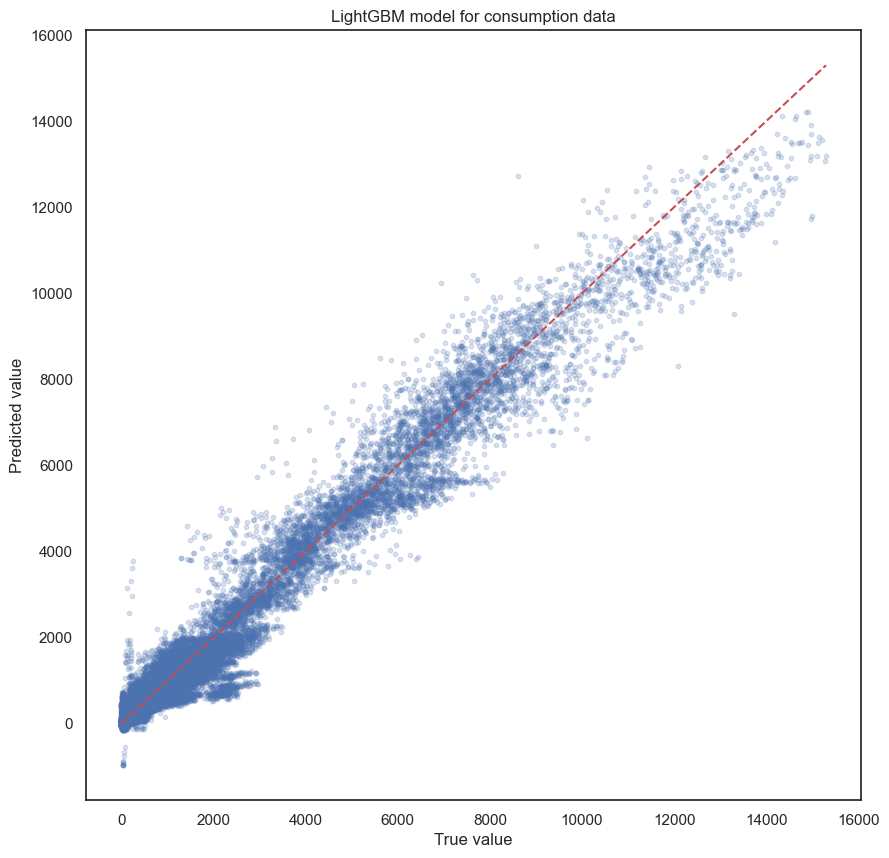

In [54]:
# Nice plots

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.2, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("LightGBM model for consumption data")


print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

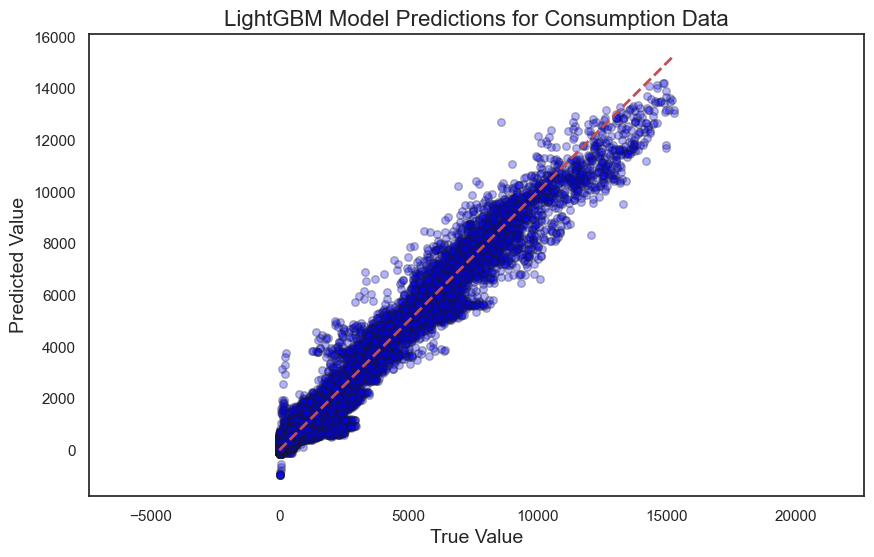

In [48]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="white")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, alpha=0.3, s=30, color='blue', edgecolor='k')

# Add a line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add titles and labels
plt.xlabel("True Value", fontsize=14)
plt.ylabel("Predicted Value", fontsize=14)
plt.title("LightGBM Model Predictions for Consumption Data", fontsize=16)
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
# Now try with XGBoost

X = consumption_data.drop(['target'], axis=1)
y = consumption_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = xgb.XGBRegressor(n_estimators=1090, max_depth=10, learning_rate=0.1, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'o')

print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))

# Finding features using Shap

In [ ]:
model = lgb.LGBMRegressor(objective='regression', n_estimators=10000, max_depth=20, learning_rate=0.1, n_jobs=-1)


# Using LGBM tuner for optimisation and then shap

In [11]:
# Seperate the dataset into production and consumption

df = df.drop(['datetime'], axis = 1)

production_data = df[df['is_consumption'] == 0]
consumption_data = df[df['is_consumption'] == 1]

In [2]:
from verstack import LGBMTuner

In [14]:
# Run quick LightGBM model for consumption

X = production_data.drop(['target'], axis=1)
y = production_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import lightgbm as lgb

# Set up parameter grid for lgb tuner

# Initialize tuner for each set of input_dat  a
tuner = LGBMTuner(metric='mae', trials=10, refit=True, verbosity=1, visualization=True, seed=42, device_type='cpu')

# Define parameter ranges
tuner.grid['max_depth'] = (5, 100)
tuner.grid['learning_rate'] = (0.001, 0.1)

# Fit tuner for each set of input_data
tuner.fit(X_train, y_train)


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 10 trials
     .. Evaluation metric: mae 
     .. Study direction: minimize mean_absolute_error



KeyboardInterrupt: 

# Comparison between consumption and production

In [58]:
consumption = df[df['is_consumption'] == 1]
production = df[df['is_consumption'] == 0]

plt.scatter(consumption['datetime'], consumption['target'], alpha=0.1)

Error in callback <function flush_figures at 0x000001987BEF8E00> (for post_execute):


KeyboardInterrupt: 